In [2]:
# Install libraries
%pip install -U pysr


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: /home/richard/Documents/p311a/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Call Libraries
#import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from google.colab import drive
from pysr import PySRRegressor
import time
#import math
import sympy as sym

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [4]:
#drive.mount('/content/drive')
df=pd.read_csv('./goossens_raw.csv')
#df=pd.read_csv('./c694/goossens_raw.csv')
#df=pd.read_csv('/content/drive/MyDrive/goossens_raw.csv')
#df
y=df['MW']
#print(y)
x=df[['SG','TBP']]

In [5]:
t0 = time.time()
# Add Power Function
myMod=PySRRegressor(
    random_state=7,
    deterministic=True,
    parallelism='serial',
    binary_operators=["+","-","*","/","^"])
myMod.fit(x,y)
y_pred=myMod.predict(x)
print("time to fit: ",time.time() - t0, 'seconds')

/home/richard/Documents/p311a/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
Compiling Julia backend...
/home/richard/Documents/p311a/lib/python3.11/site-packages/pysr/sr.py:96: UserWarning: You are using the `^` operator, but have not set up `constraints` for it. This may lead to overly complex expressions. One typical constraint is to use `constraints={..., '^': (-1, 1)}`, which will allow arbitrary-complexity base (-1) but only powers such as a constant or variable (1). For more tips, please see https://ai.damtp.cam.ac.uk/pysr/tuning/
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 9.510e+04
Progress: 476 / 3100 total iterations (15.355%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           9.627e+04  0.000e+00  y = 304.55
3           2.941e+04  5.897e-01  y = TBP + -270.61
5           1.858e+04  2.281e-01  y = (TBP * TBP) * 0.00093598
7           3.099e+03  8.948e-01  y = -248.45 * (TBP / (TBP - 1184.9))
9           4.702e+02  9.428e-01  y = ((TBP * -194.92) / (TBP - 1149.2)) / SG
11          5.343e+01  1.087e+00  y = (((TBP * -239.25) / (TBP - 1179.6)) - 37.678) / SG
13          4.944e+01  3.883e-02  y = -19.219 + (((-243.37 * (TBP / (TBP - 1182.1))) - 25.13...
                                      1) / SG)
15          4.920e+01  2.406e-03  y = ((TBP / (TBP - 1181.6)) + ((SG * 0.083607) - -0.097894...
                          

[ Info: Final population:
[ Info: Results saved to:


time to fit:  52.771831035614014 seconds
  - outputs/20250721_142542_43Mqe4/hall_of_fame.csv


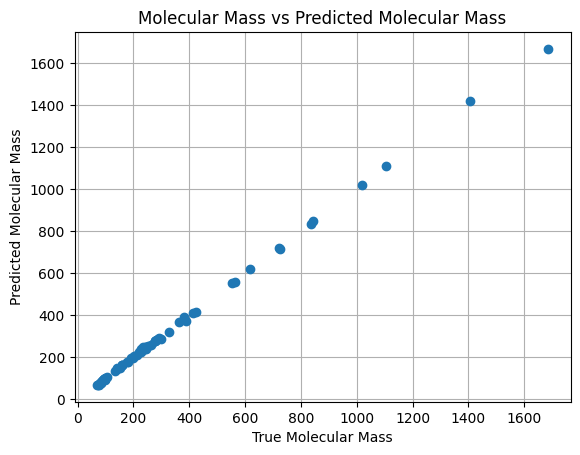

In [6]:
plt.plot(y,y_pred,marker="o",linestyle="None")
plt.xlabel('True Molecular Mass')
plt.ylabel('Predicted Molecular Mass')
plt.title('Molecular Mass vs Predicted Molecular Mass')
plt.grid()
plt.show()

In [7]:
# Pull Out Equation
myEq=myMod.sympy()
# Clean-Up Equation
sym.simplify(myEq)

SG**(-SG - 0.13152155)*(40968.0752751965 - 272.392245*TBP)/(TBP - 1177.6129)

In [8]:
# Add Prediction to Dataframe
df['Fit_Mw']=y_pred
# Calculate Correlation Coefficient between columns
df.corr()

,SG,TBP,MW,Fit_Mw
SG,1.000000,0.625218,0.334852,0.335358
TBP,0.625218,1.000000,0.869591,0.870516
MW,0.334852,0.869591,1.000000,0.999848
Fit_Mw,0.335358,0.870516,0.999848,1.000000


In [9]:
print(myMod)

PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                          304.55096   
	1         0.592876                                   TBP + -270.59854   
	2         0.229607                         (TBP * TBP) * 0.0009359819   
	3         0.982019              (TBP * -217.31314) / (TBP - 1153.438)   
	4         0.857675      (TBP * (-193.88962 / SG)) / (TBP - 1148.1691)   
	5         1.091579  ((TBP * (-237.78265 / (TBP - 1178.4252))) + -3...   
	6         0.093111  (((TBP * -238.2065) / (TBP - 1179.8871)) - 38....   
	7   >>>>  0.201868  ((TBP * (-237.60316 / (TBP - 1177.6129))) + -3...   
	8         0.050231  ((TBP * (-237.26666 / (TBP - 1177.8707))) + -3...   
	9         0.003625  ((((TBP * -237.36745) / (TBP - 1177.7488)) + -...   
	10        0.001665  ((((TBP * (-237.37054 / (TBP - 1177.7427))) + ...   
	11        0.002823  (((SG ^ -2.2065597) + (((TBP / (TBP - 1177.937...   
	12      